In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset from the UCI Machine Learning Repository
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Define the features and target variable
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Set the number of input, hidden and output nodes
input_nodes = X_train.shape[1]
hidden_nodes = 4
output_nodes = 1

# Initialize the weights
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))

# Set the learning rate
learning_rate = 0.5

# Train the neural network using backpropagation
for epoch in range(50000):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y_train.reshape(-1, 1) - output_layer_output

    # Backward pass
    d_output_layer_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output_layer_output.dot(weights_hidden_output.T)
    d_hidden_layer_output = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update the weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output_layer_output) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden_layer_output) * learning_rate

# Make predictions on the test set
hidden_layer_input = np.dot(X_test, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
output_layer_output = sigmoid(output_layer_input)
y_pred = (output_layer_output > 0.5).astype(int).flatten()

# Calculate the accuracy on the test set
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9824561403508771


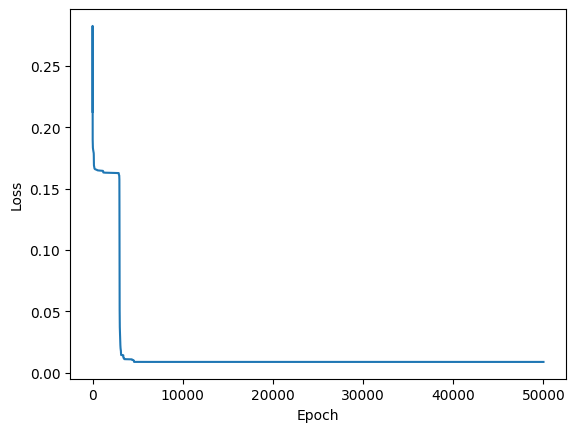

Accuracy: 0.956140350877193


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset from the UCI Machine Learning Repository
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Define the features and target variable
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Set the number of input, hidden and output nodes
input_nodes = X_train.shape[1]
hidden_nodes = 4
output_nodes = 1

# Initialize the weights
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))

# Set the learning rate
learning_rate = 0.5

# Initialize a list to store the loss during training
losses = []

# Train the neural network using backpropagation
for epoch in range(50000):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y_train.reshape(-1, 1) - output_layer_output

    # Store the mean squared error for this epoch
    losses.append(np.mean(error**2))

    # Backward pass
    d_output_layer_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output_layer_output.dot(weights_hidden_output.T)
    d_hidden_layer_output = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update the weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output_layer_output) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden_layer_output) * learning_rate

# Plot the loss during training
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Make predictions on the test set
hidden_layer_input = np.dot(X_test, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
output_layer_output = sigmoid(output_layer_input)
y_pred = (output_layer_output > 0.5).astype(int).flatten()

# Calculate the accuracy on the test set
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')


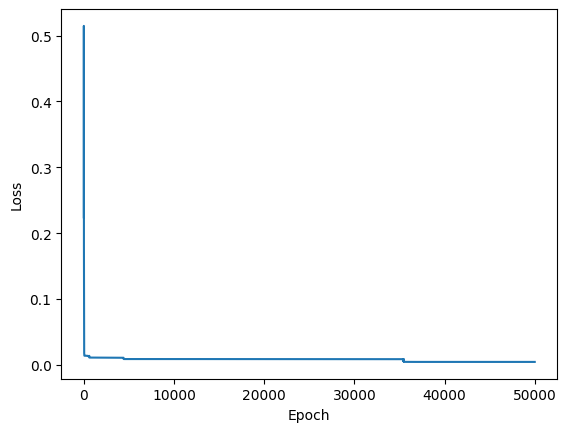

Accuracy: 0.956140350877193


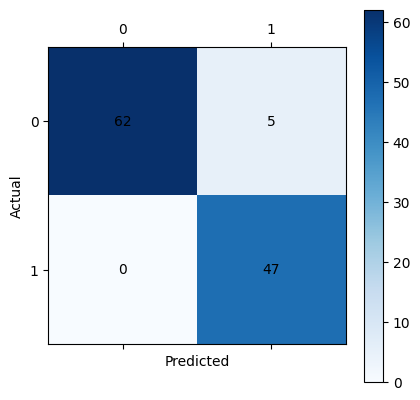

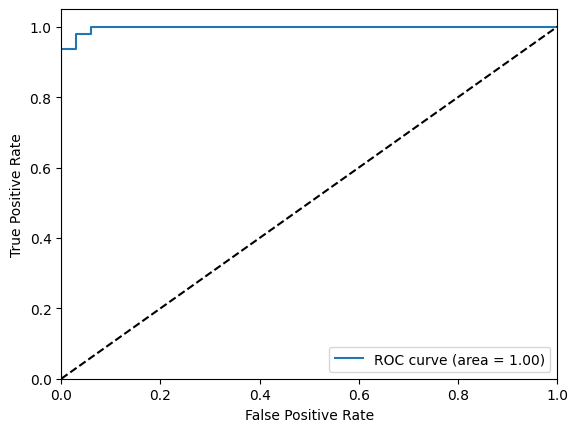

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset from the UCI Machine Learning Repository
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Define the features and target variable
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Set the number of input, hidden and output nodes
input_nodes = X_train.shape[1]
hidden_nodes = 4
output_nodes = 1

# Initialize the weights
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))

# Set the learning rate
learning_rate = 0.5

# Initialize a list to store the loss during training
losses = []

# Train the neural network using backpropagation
for epoch in range(50000):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y_train.reshape(-1, 1) - output_layer_output

    # Store the mean squared error for this epoch
    losses.append(np.mean(error**2))

    # Backward pass
    d_output_layer_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output_layer_output.dot(weights_hidden_output.T)
    d_hidden_layer_output = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update the weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output_layer_output) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden_layer_output) * learning_rate

# Plot the loss during training
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Make predictions on the test set
hidden_layer_input = np.dot(X_test, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
output_layer_output = sigmoid(output_layer_input)
y_pred_proba = output_layer_output.flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate the accuracy on the test set
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
